In [1]:
%matplotlib inline
import os
import time
import axelrod as axl
import axelrod_dojo as axl_dojo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C, D = axl.Action

col_names = ["generation", "mean_score", "standard_deviation", "best_score", "sequence"]

# Data Read Functions:

In [2]:
data_path = "data/"

opponent_names = [
    "alternator",
    "collectivestrategy",
    "evolved_fsm_16",
    "grudger",
    "random__0.5",
    "tit_for_tat",
    "zd-extortion__0.2,_0.1,_1",
    "champion"
]

analysis_types_old = [
    "generation",
    "mutation_frequency",
    "mutation_potency",
    "pop"
]

analysis_types_new = [
    "gen_NEW_POP",
    "mutation_frequency_NEW_POP",
    "mutation_potency_NEW_POP",
    "pop_NEW_POP",
    "pop_NEW_POP_old"
]

analysis_kws = {
    "generation": "generations",
    "mutation_frequency": "mutation_frequency",
    "mutation_potency": "mutation_potency",
    "pop": "population",
    "gen_NEW_POP": "gen_len",
    "mutation_frequency_NEW_POP": "mutation_frequency",
    "mutation_potency_NEW_POP": "mutation_potency",
    "pop_NEW_POP": "population",
    "pop_NEW_POP_old": "population"
}

In [3]:
old_data = []
new_data = []
for op in opponent_names:
    for tp in analysis_types_old:
        old_data.append((op, tp, pd.read_csv(data_path + op + "_" + tp+".csv")))
    
    for tpN in analysis_types_new:
        new_data.append((op, tpN, pd.read_csv(data_path + op + "_"+ tpN+".csv")))

all_data = old_data + new_data

In [4]:
list_gen_NEW_POP = [x for x in new_data if x[1]=="gen_NEW_POP"]
list_mut_freq_NEW_POP = [x for x in new_data if x[1]=="mutation_frequency_NEW_POP"]
list_mut_pot_NEW_POP = [x for x in new_data if x[1]=="mutation_potency_NEW_POP"]
list_pop_NEW_POP = [x for x in new_data if x[1]=="pop_NEW_POP"]
list_pop_NEW_POP_old = [x for x in new_data if x[1]=="pop_NEW_POP_old"]

list_generation = [x for x in old_data if x[1]=="generation"]
list_mutation_frequency = [x for x in old_data if x[1]=="mutation_frequency"]
list_mutation_potency = [x for x in old_data if x[1]=="mutation_potency"]
list_pop = [x for x in old_data if x[1]=="pop"]

In [5]:
def get_single_df(opponent,analysis_name):
    for item in all_data:
        if item[0]==opponent and item[1]==analysis_name:
            return item
    
    print("no data found.")
    return(None)

# Plotting Functions

In [7]:
def plot_df(axs, in_tuple, grouping_kw, x, y, scatter=False):
    if axs == None:
        fig, axs = plt.subplots()
    
    opponent = in_tuple[0]
    analysis = in_tuple[1]
    in_df = in_tuple[2]
    
    if scatter:
        max_val = 0.01
        for label, df in in_df.groupby(grouping_kw):
            axs.scatter(label,df[y].mean(),label=label)
            if df[y].mean() > 1.5: max_val = 4
            
        axs.axhline(0)
        axs.set_ylim([-0.001,max_val])
        axs.set(xlabel=grouping_kw.replace("_", " ").title(),
                ylabel=y.replace("_", " ").title()+" Mean")
        
    else:
        for label, df in in_df.groupby(grouping_kw):
            axs.plot(df[x],df[y],label=label)
        
        axs.set(xlabel=x.replace("_", " ").title(),
                ylabel=y.replace("_", " ").title())
        
#     axs.set(title=str(opponent + ": " + analysis))
    axs.set(title=str(opponent))
    
    axs.legend()
    return axs

In [8]:
def plot_analysis_type_for_all(columns, rows, data_list, grouping_kw, x, y, x_share=False, y_share=False,size=(15,10),scatter=False,xkcd=False):
    
    if xkcd:
        plt.xkcd()

    fig, axes = plt.subplots(ncols=columns, nrows=rows, sharex=x_share, sharey=y_share, figsize=size)
    fig.tight_layout(h_pad=3,w_pad=2)
    
    indexes = [(r,c) for r in range(rows) for c in range(columns)]
    
#      = {
#        'fontsize': 'large',
#         }
    
    i=0
    for opponent_tuple in data_list:
        axes_to_pass = axes[indexes[i][0]][indexes[i][1]]
        plot_df(axes_to_pass, opponent_tuple, grouping_kw, x, y, scatter)
        i += 1
    
    return fig

# Plots

## Population

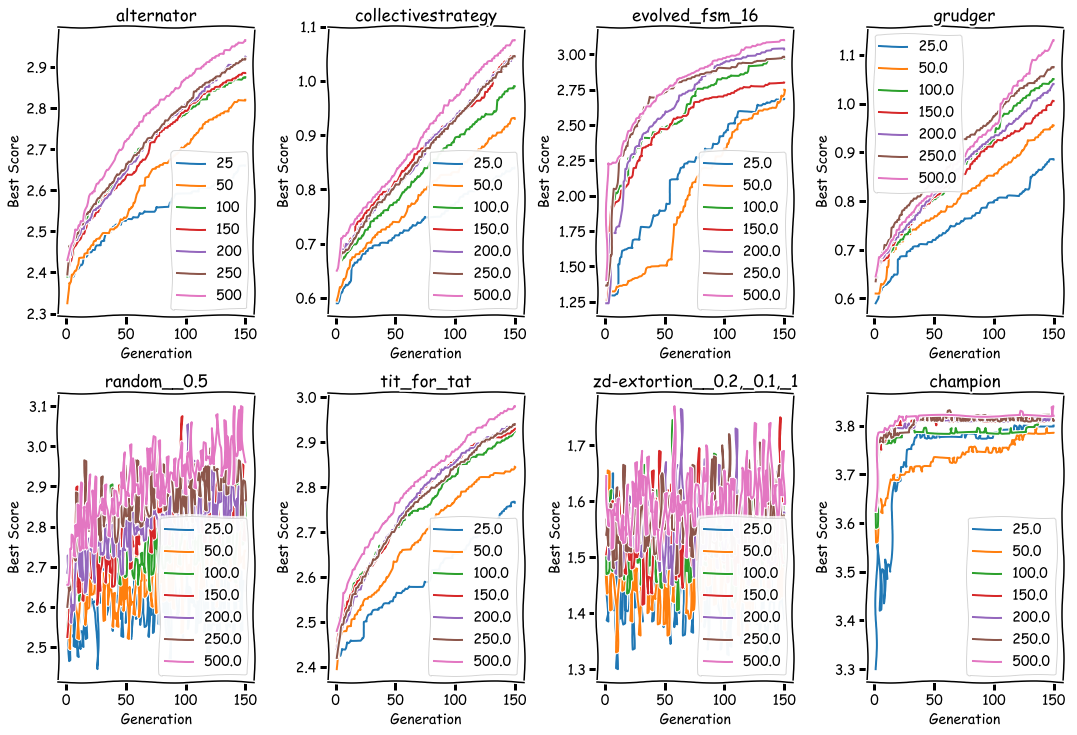

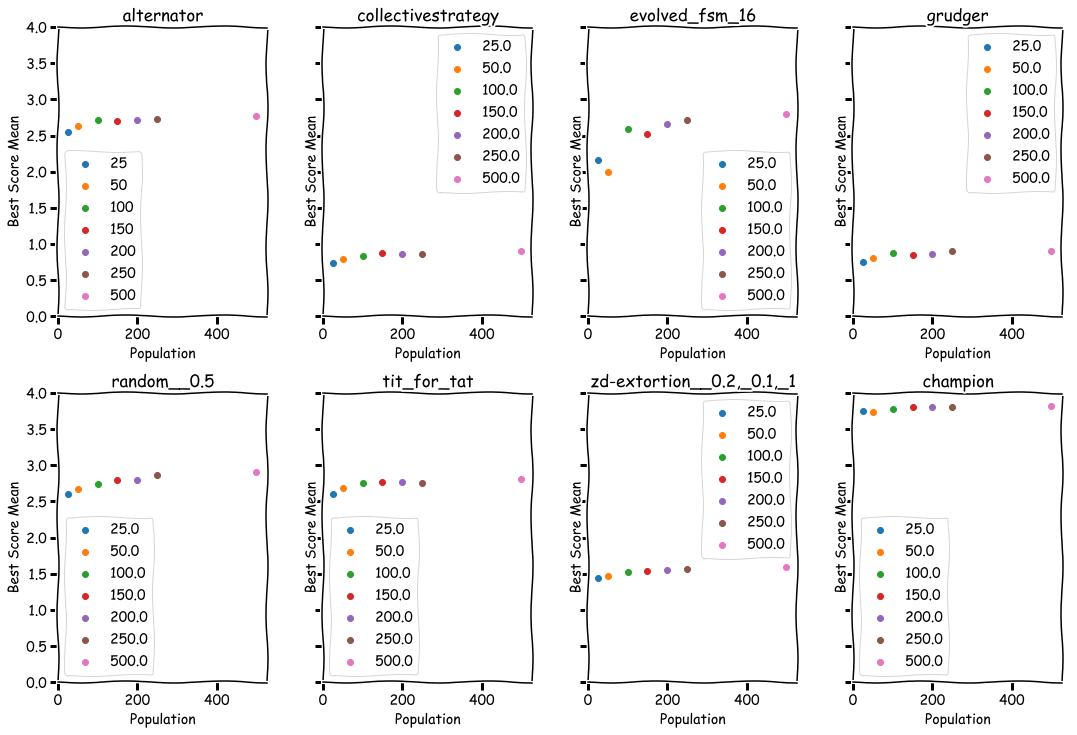

In [9]:
INIT_POP_bs_v_gens_all = plot_analysis_type_for_all(4,2,list_pop,'population','generation','best_score')

INIT_POP_mean_bs_diff_v_init_pop_all = plot_analysis_type_for_all(4, 2, list_pop,'population','generation','best_score',y_share=True,scatter=True)

## Generation Length

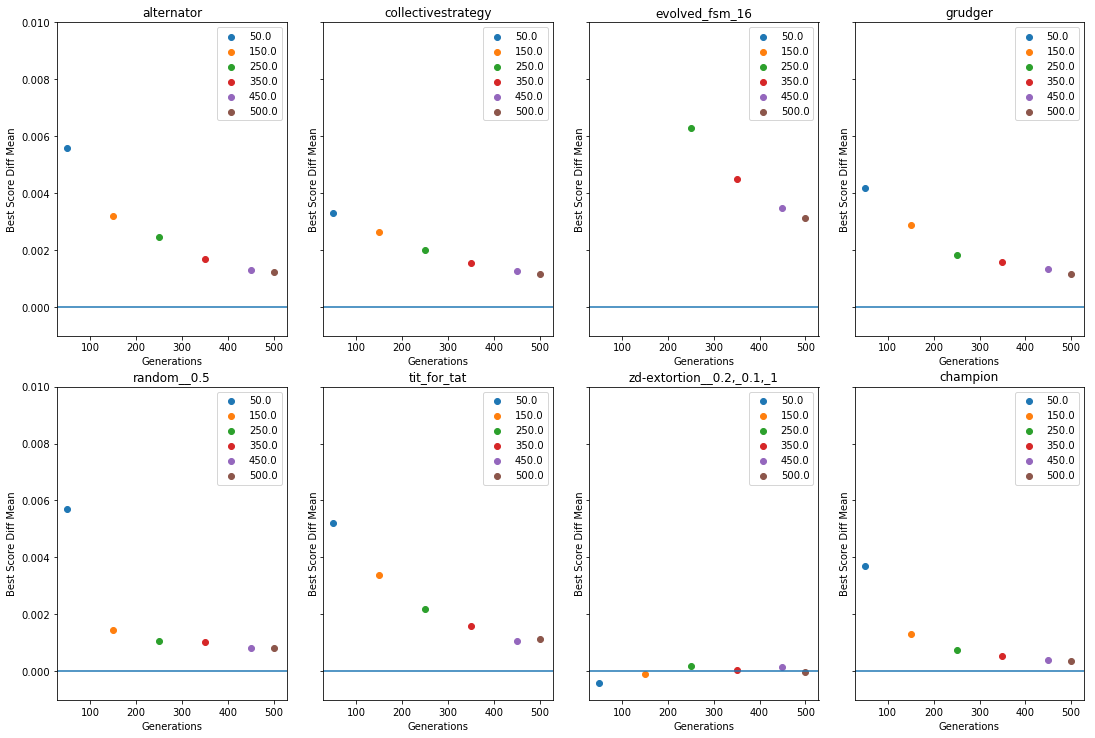

In [9]:
GENS_mean_bs_diff_v_gens_all = plot_analysis_type_for_all(4,2,list_generation,'generations',x="",y="best_score_diff",y_share=True,scatter=True)

# GENS_max_bs_v_gens_all = _
# plot_analysis_type_for_all(4,2,list_mutation_frequency,'mutation_frequency',x="mutation_frequency",y="best_score_diff",y_share=True,scatter=True)

## Mutation Potency

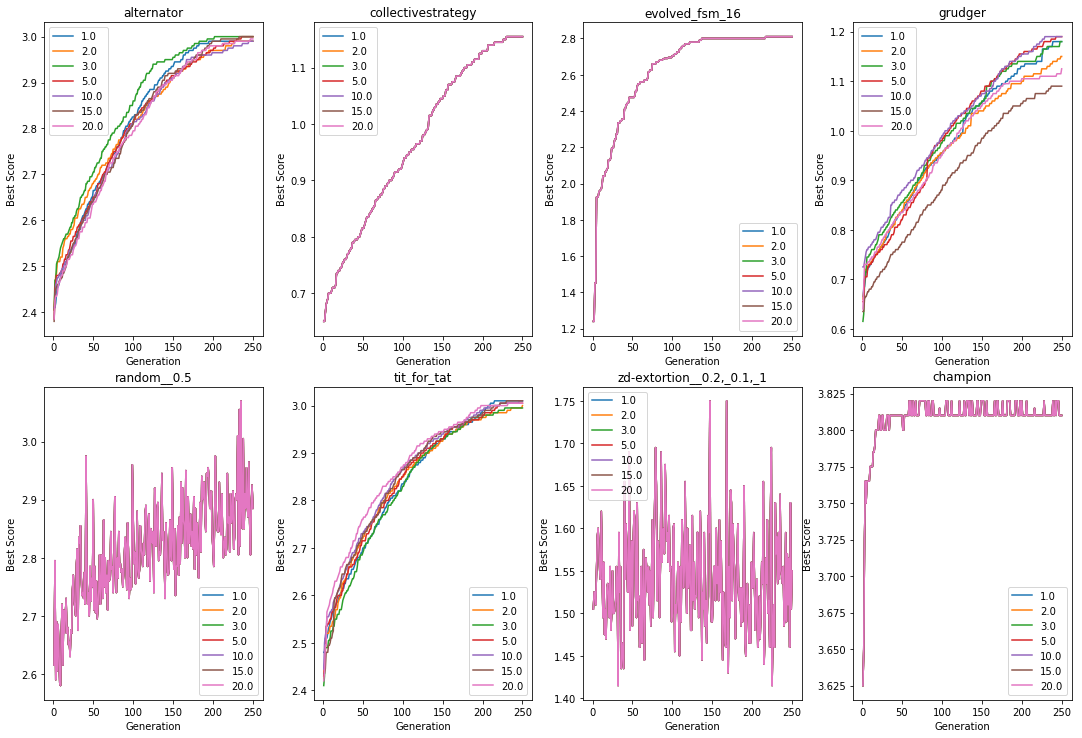

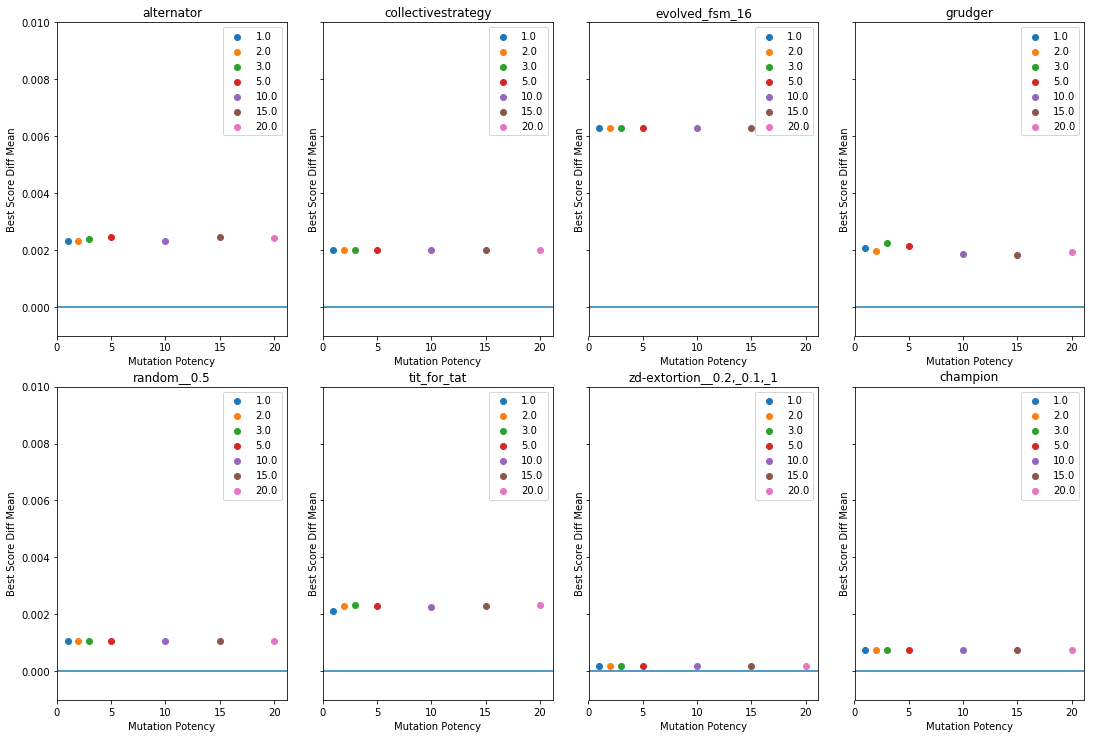

In [10]:
MUT_POT_bs_v_gen_all = plot_analysis_type_for_all(4,2, list_mutation_potency,'mutation_potency',x="generation",y="best_score")

MUT_POT_bs_diff_v_pot_all = plot_analysis_type_for_all(4,2,list_mutation_potency,'mutation_potency',x="",y="best_score_diff",y_share=True,scatter=True)

## Mutaiton Frequency

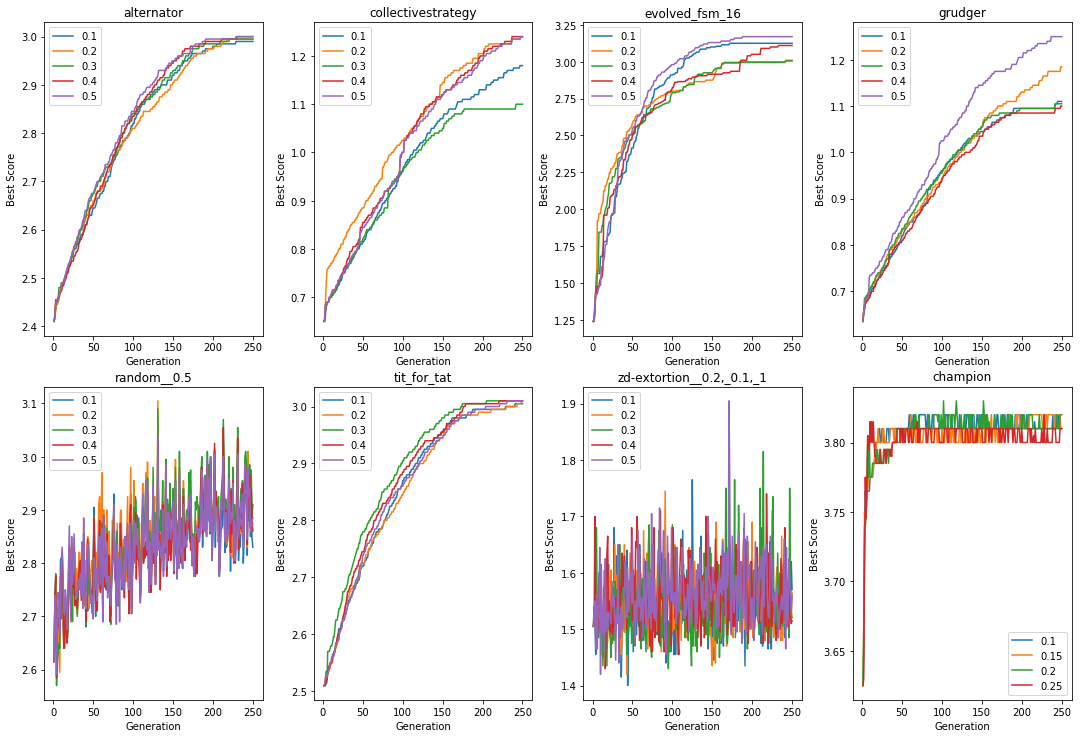

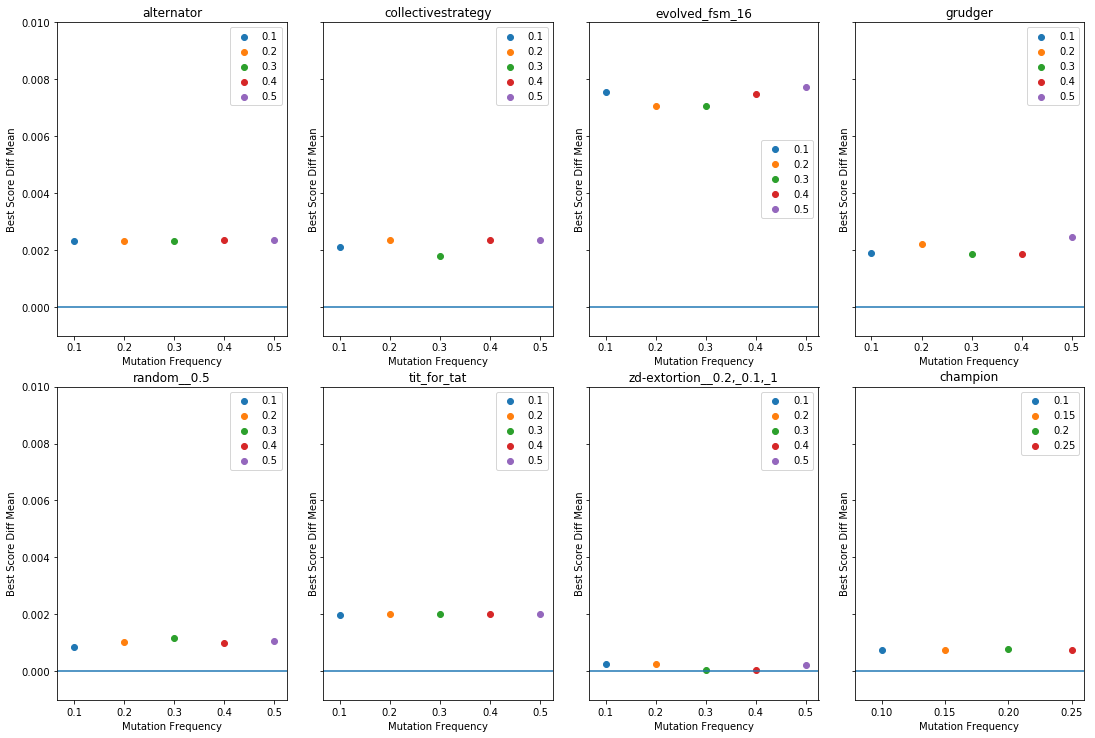

In [11]:
MUT_FREQ_bs_v_gen_all = plot_analysis_type_for_all(
    columns=4, rows=2,
    data_list=list_mutation_frequency,
    grouping_kw='mutation_frequency',
    x="generation",
    y="best_score")

MUT_FREQ_bs_diff_v_freq_all = plot_analysis_type_for_all(4,2,list_mutation_frequency,'mutation_frequency',x="",y="best_score_diff",y_share=True,scatter=True)

## NEW - Population

--------


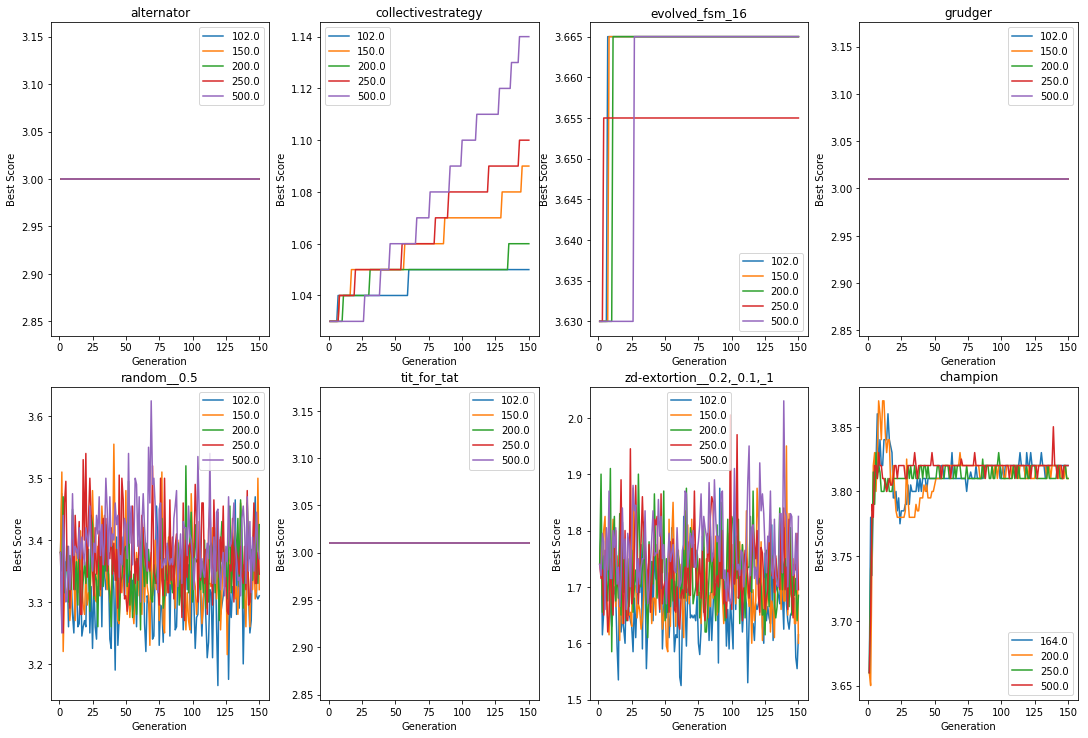

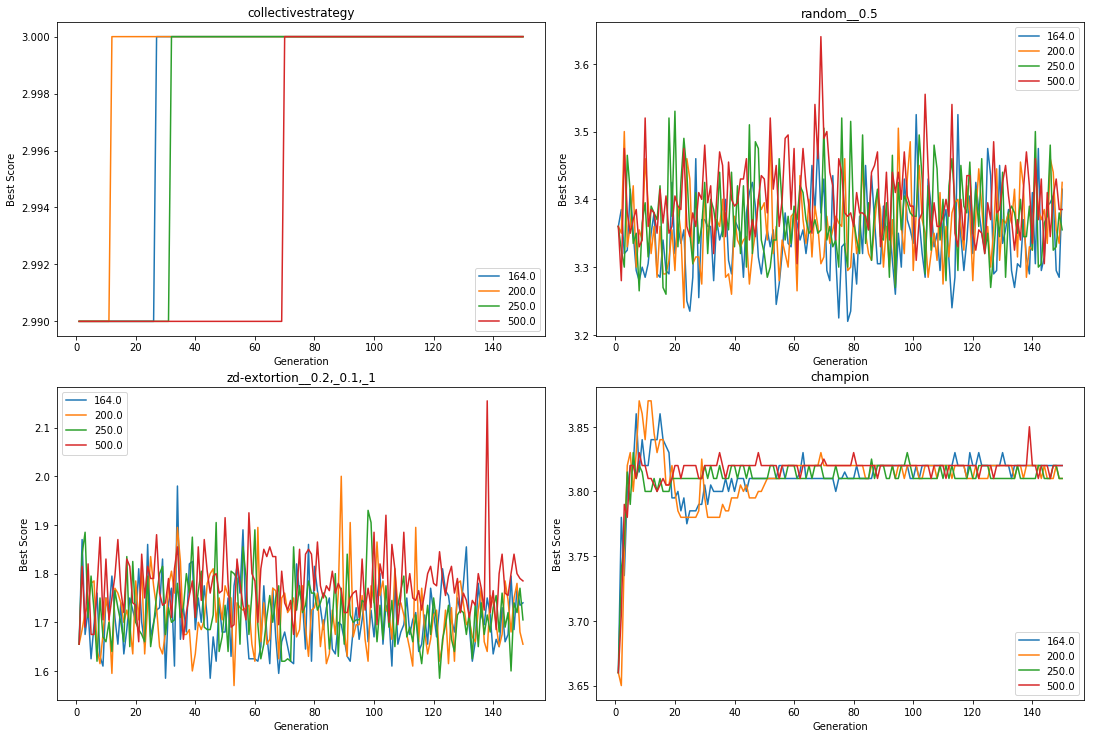

In [21]:
NEW_INIT_POP_bs_v_gen_all_old = plot_analysis_type_for_all(
    columns=4, rows=2,
    data_list=list_pop_NEW_POP_old,
    grouping_kw='population',
    x="generation",
    y="best_score")

# NEW_INIT_POP_bs_v_gen_all = plot_analysis_type_for_all(
#     columns=4, rows=2,
#     data_list=list_pop_NEW_POP,
#     grouping_kw='population',
#     x="generation",
#     y="best_score")

non_performers = []
for item in list_pop_NEW_POP:
    if item[0] in ["collectivestrategy","zd-extortion__0.2,_0.1,_1","champion","random__0.5"]:
        non_performers.append(item)
        
NEW_INIT_POP_bs_v_gen_non_performers = plot_analysis_type_for_all(
    columns=2, rows=2,
    data_list=non_performers,
    grouping_kw='population',
    x="generation",
    y="best_score")

## NEW - Generation

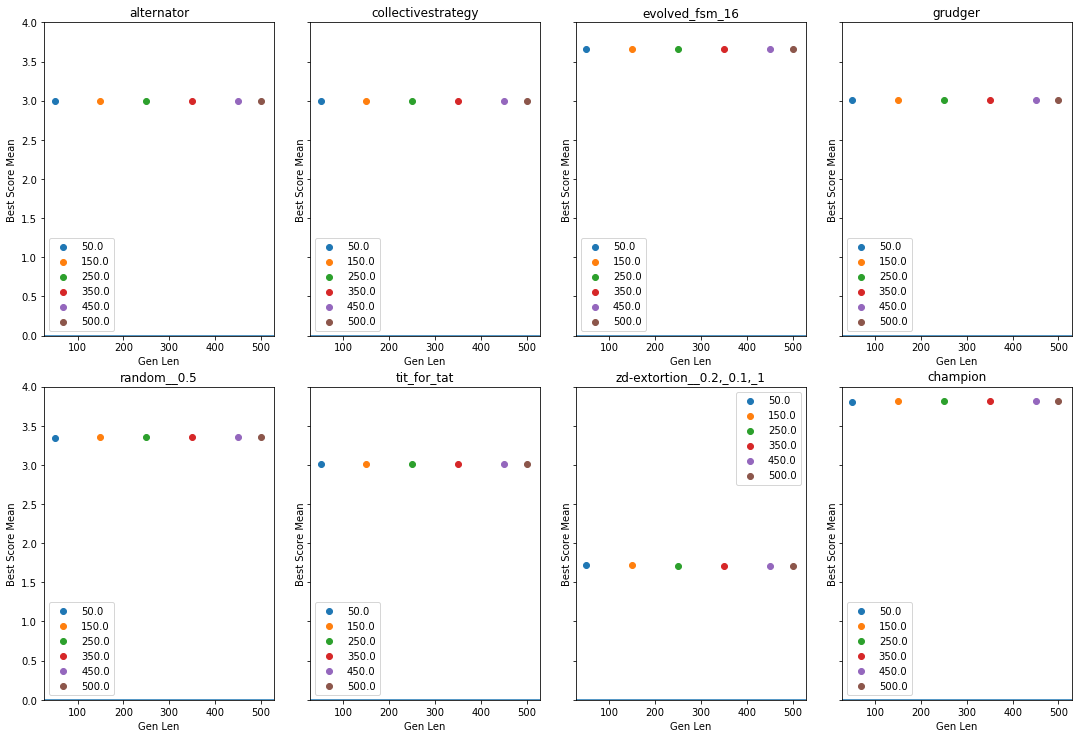

In [13]:
NEW_GEN_bs_v_gen_all = plot_analysis_type_for_all(
    columns=4, rows=2,
    data_list=list_gen_NEW_POP,
    grouping_kw='gen_len',
    x="",
    y="best_score",
    y_share=True,
    scatter=True)

## NEW - Mutation Potency

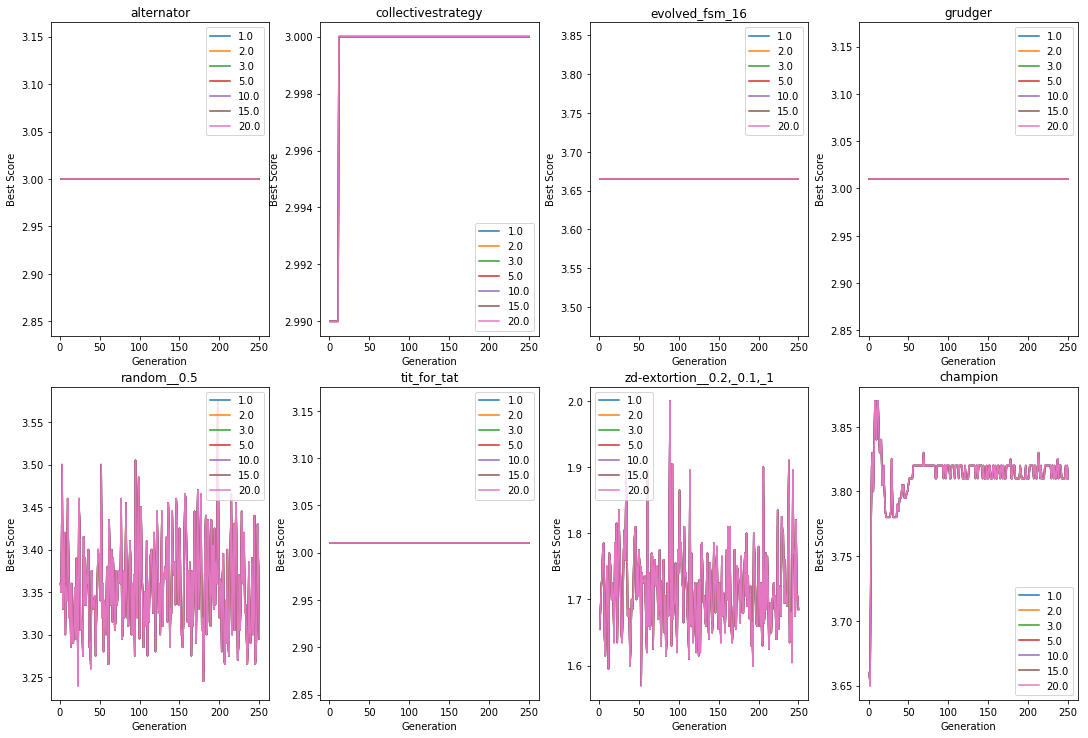

In [14]:
NEW_MUT_POT_bs_v_gen_all = plot_analysis_type_for_all(
    columns=4, rows=2,
    data_list=list_mut_pot_NEW_POP,
    grouping_kw='mutation_potency',
    x="generation",
    y="best_score")

NEW_MUT_POT_bs_v_gen_all = plot_analysis_type_for_all(
    columns=4, rows=2,
    data_list=list_mut_pot_NEW_POP,
    grouping_kw='mutation_potency',
    x="generation",
    y="best_score")

## NEW - Mutation Frequency

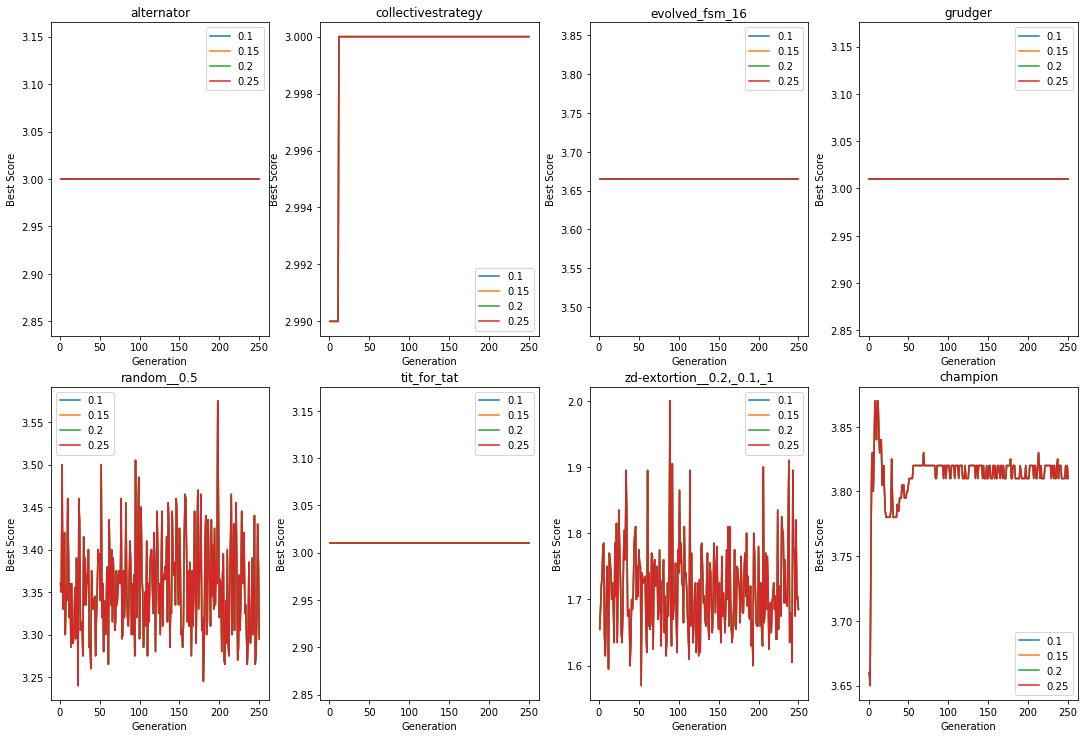

In [15]:
NEW_MUT_FREQ_bs_v_gen_all = plot_analysis_type_for_all(
    columns=4, rows=2,
    data_list=list_mut_freq_NEW_POP,
    grouping_kw='mutation_frequency',
    x="generation",
    y="best_score")

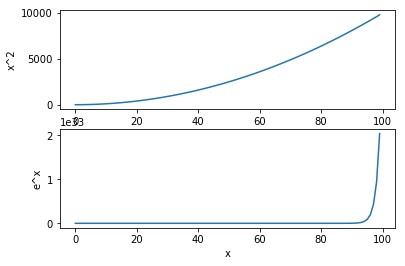

In [22]:
fig2, axs2 = plt.subplots(2)

x = range(100)
y1 = [xi*xi for xi in x]
y2 = [2.17**xi for xi in x]

axs2[0].plot(x,y1)
axs2[0].set(xlabel="x",
        ylabel="x^2")


axs2[1].plot(x,y2)
axs2[1].set(xlabel="x",
        ylabel="e^x")


## Saving

In [17]:
# #population
# INIT_POP_bs_v_gens_all.savefig("plots/INIT_POP_bs_v_gens_all.pdf")
# INIT_POP_mean_bs_diff_v_init_pop_all.savefig("plots/INIT_POP_mean_bs_diff_v_init_pop_all.pdf")

# #generations
# GENS_mean_bs_diff_v_gens_all.savefig("plots/GENS_mean_bs_diff_v_gens_all.pdf")

# #mutation potency
# MUT_POT_bs_v_gen_all.savefig("plots/MUT_POT_bs_v_gen_all.pdf")
# MUT_POT_bs_diff_v_pot_all.savefig("plots/MUT_POT_bs_diff_v_pot_all.pdf")

# #mutation frequency
# MUT_FREQ_bs_v_gen_all.savefig("plots/MUT_FREQ_bs_v_gen_all.pdf")
# MUT_FREQ_bs_diff_v_freq_all.savefig("plots/MUT_FREQ_bs_diff_v_freq_all.pdf")

# #NEW - population
# NEW_INIT_POP_bs_v_gen_all_old.savefig("plots/NEW_INIT_POP_bs_v_gen_all_old.pdf")
# NEW_INIT_POP_bs_v_gen_non_performers.savefig("plots/NEW_INIT_POP_bs_v_gen_non_performers.pdf")

# #NEW - generations
# NEW_GEN_bs_v_gen_all.savefig("plots/NEW_GEN_bs_v_gen_all.pdf")

# #NEW - mutation potency
# NEW_MUT_POT_bs_v_gen_all.savefig("plots/NEW_MUT_POT_bs_v_gen_all.pdf")

# #NEW - mutation frequency
# NEW_MUT_FREQ_bs_v_gen_all.savefig("plots/NEW_MUT_FREQ_bs_v_gen_all.pdf")

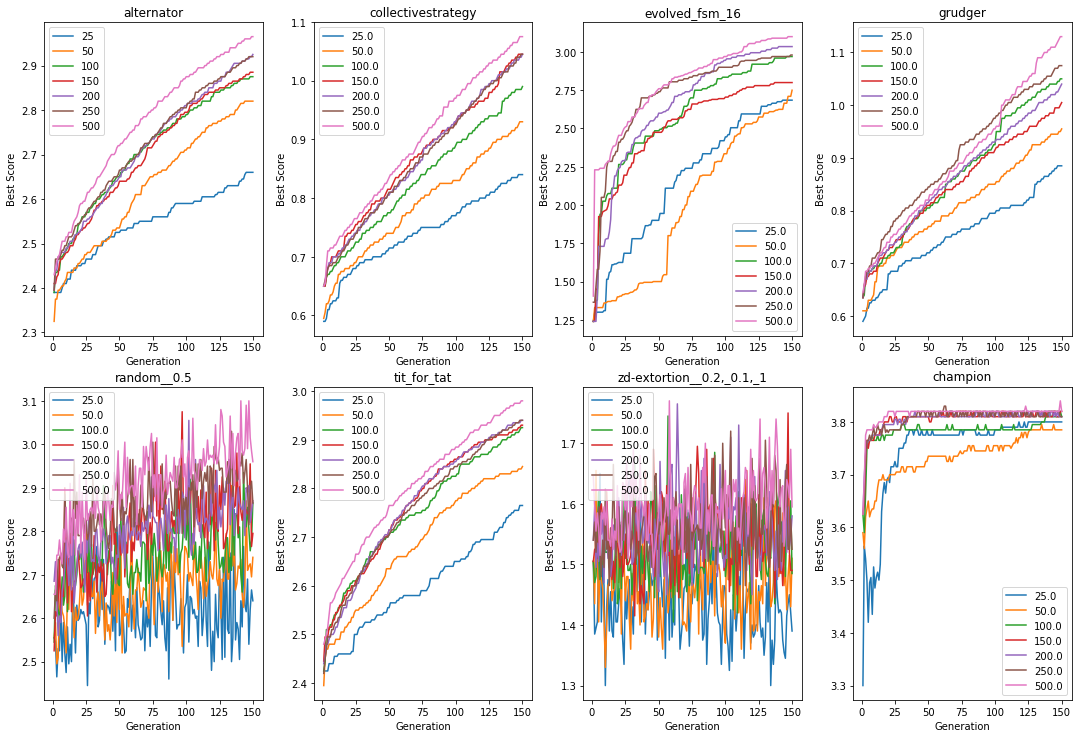

In [18]:
INIT_POP_bs_v_gens_all

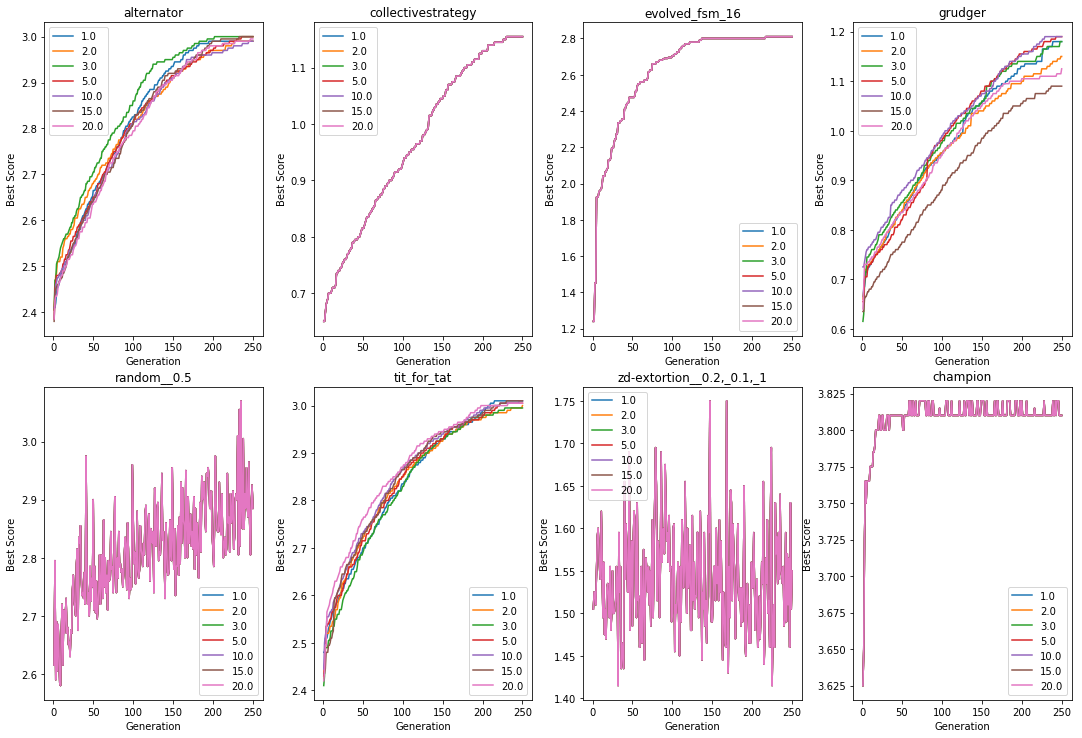

In [19]:
MUT_POT_bs_v_gen_all

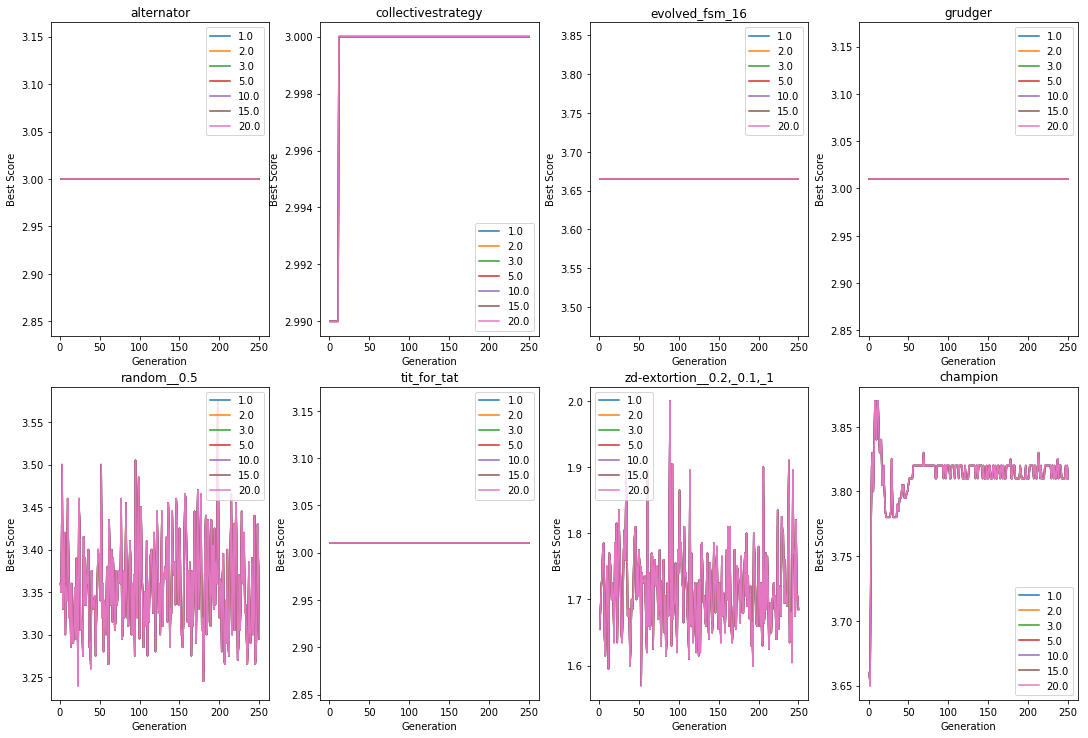

In [20]:
NEW_MUT_POT_bs_v_gen_all

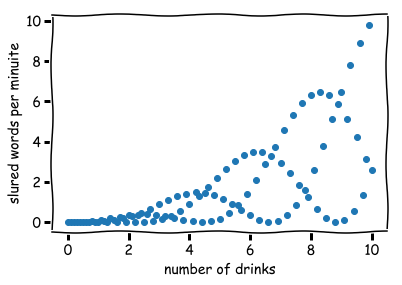

In [32]:
import numpy as np

x_range = range(101)
y_range = [(x**2 * np.sin(x)**2)/1000 for x in x_range]

plt.xkcd()

plt.scatter([x/10 for x in x_range],y_range)
plt.xlabel("number of drinks")
plt.ylabel("slured words per minuite")